In [35]:
# Lorena Pérez 20200396

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cvlib

PATH = 'img/'

In [2]:
def view(img):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)   
    plt.axis('off')
    plt.show()

### Preguntas:
1. ¿Cuantos granos de arroz hay? Arroces completos, ignorando los que están en el borde partidos.
2. ¿Cuales son los granos más similares? 2 arroces más similares.
3. ¿Cual es la orientación de cada arroz? 0 a 180 grados.

## Pregunta 1

In [12]:
# Definición del kernel

kernel = np.array([[  0,   0, 255,   0,  0],
                   [  0, 255, 255, 255,  0],
                   [255, 255, 255, 255, 255],
                   [255, 255, 255, 255, 255],
                   [  0, 255, 255, 255,  0],
                   [  0,   0, 255,   0,  0]], np.uint8)

In [13]:
im = cv.imread(PATH+'rice.png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)

# adaptive Th
imgbin = cv.adaptiveThreshold(imgray, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,127,5)
imgope = cv.morphologyEx(imgbin, cv.MORPH_OPEN, kernel)

# operacion para separar los arroces
erosion = cv.erode(imgbin, kernel, iterations=1)

# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(erosion, mode, method[1])

(256, 256)


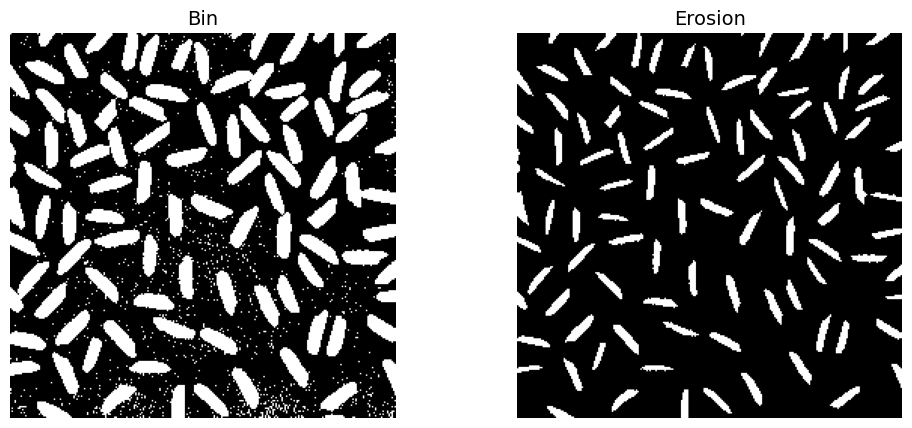

In [14]:
import plot
plot.imgcmp(imgbin, erosion, title1=["Bin", "Erosion"])

In [17]:
filtered_i = []
border_threshold = 4 # rango de ignorancia para el borde
for contour in range(len(contours)):
    for point in contours[contour]:
        x, y = point[0]
        # ignorando arroces que están en el borde
        if x < border_threshold or x > im.shape[1] - border_threshold or \
           y < border_threshold or y > im.shape[0] - border_threshold:
            break
    else:
        filtered_i.append(contour)

In [18]:
print(f"Hay {len(filtered_i)} arroces completos.")

Hay 73 arroces completos.


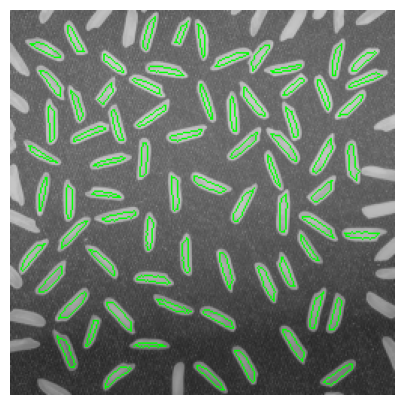

In [19]:
color = (0,255,0) #(r,g,b)
thickness = 1
r = im.copy()
for c in filtered_i:
    r = cv.drawContours(r, contours, c, color, thickness)
view(r)

## Pregunta 2

In [20]:
im = cv.imread(PATH+'rice.png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)

# adaptive Th
imgbin = cv.adaptiveThreshold(imgray, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,127,5)

# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

(256, 256)


In [22]:
contours_area = []
contours_i = []
contours_t = []

for index in range(len(contours)):
    cnt = cv.contourArea(contours[index])
    # ignorando contornos muy pequeños
    if cnt > 110:
        contours_area.append(cnt)
        contours_i.append(index)
        contours_t.append(contours[index])

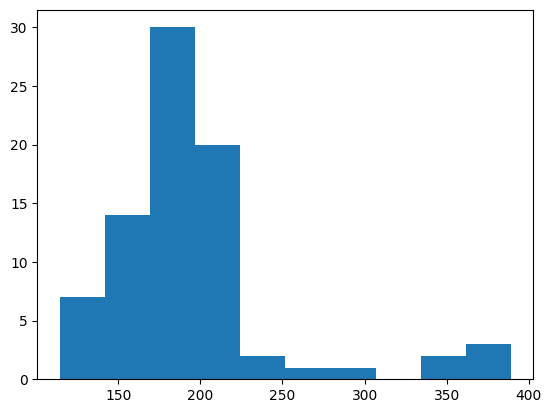

In [23]:
plt.figure()
plt.hist(contours_area)
plt.show()

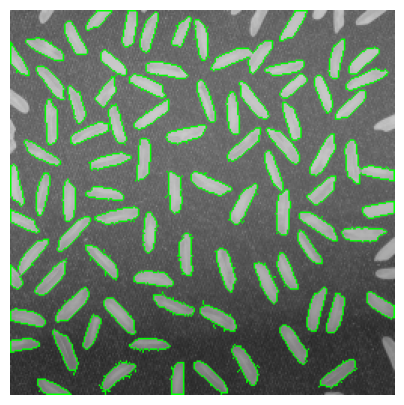

In [25]:
color = (0,255,0) #(r,g,b)
thickness = 1
r = im.copy()
# visualización de los contornos a comparar
for c in contours_i:
    r = cv.drawContours(r, contours, c, color, thickness)
view(r)

In [26]:
simil_scores = []
for i, contour1 in enumerate(contours_t):
    for j, contour2 in enumerate(contours_t):
        if i < j:
            distance = cv.matchShapes(contour1, contour2, cv.CONTOURS_MATCH_I2, 0)
            if distance < 0.2:
                simil_scores.append((i, j, distance))

In [27]:
for i, j, distance in simil_scores:
   print(f"Contour_i {i} - Contour_i {j}: Similar: {distance}")

Contour_i 2 - Contour_i 39: Similar: 0.17373558893873003
Contour_i 4 - Contour_i 9: Similar: 0.13907864842162942
Contour_i 4 - Contour_i 20: Similar: 0.1395163476646757
Contour_i 5 - Contour_i 6: Similar: 0.17860589061485255
Contour_i 5 - Contour_i 8: Similar: 0.13220822477923544
Contour_i 5 - Contour_i 28: Similar: 0.12131345203244193
Contour_i 5 - Contour_i 35: Similar: 0.18078823647727482
Contour_i 5 - Contour_i 64: Similar: 0.0854476953697273
Contour_i 5 - Contour_i 65: Similar: 0.13076807063174667
Contour_i 6 - Contour_i 8: Similar: 0.15117828122147214
Contour_i 6 - Contour_i 26: Similar: 0.19135489878530765
Contour_i 6 - Contour_i 28: Similar: 0.18618985168389102
Contour_i 6 - Contour_i 30: Similar: 0.14777171076436146
Contour_i 6 - Contour_i 48: Similar: 0.1759653923088076
Contour_i 8 - Contour_i 26: Similar: 0.11195936859340094
Contour_i 8 - Contour_i 58: Similar: 0.17191717198735534
Contour_i 8 - Contour_i 64: Similar: 0.1300455766568962
Contour_i 8 - Contour_i 71: Similar: 0.

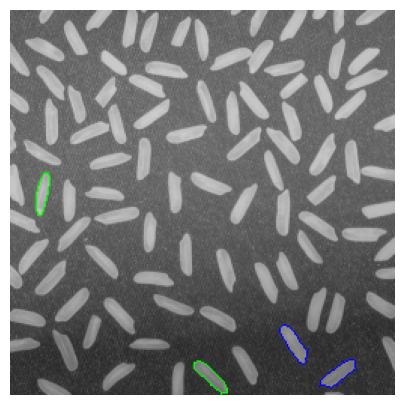

In [28]:
colors = [(0, 255, 0), (0, 0, 255), (255, 0, 0), (255, 255, 0), (0, 255, 255)]

thickness = 1
r = im.copy()
# filtro los dos arroces más parecidos
similares = 2
for idx, (i, j, _) in enumerate(simil_scores[:similares]):
    color = colors[idx % len(colors)]
    r = cv.drawContours(r, contours_t, i, color, thickness)
    r = cv.drawContours(r, contours_t, j, color, thickness)
view(r)

## Pregunta 3

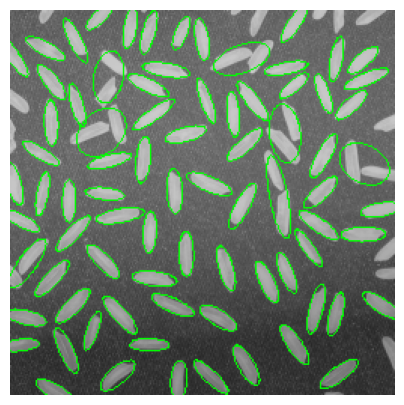

In [29]:
angle = []
r = im.copy()
index_a = []
# para la orientación se toma en cuenta la ellipse
for index in contours_i:
    ellipse = cv.fitEllipse(contours[index])
    # se ajusta el angulo ya que es el complemento para los 90 grados.
    if ellipse[2] <= 90:
        angle.append(90 - ellipse[2])
    elif ellipse[2] > 90:
        angle.append(180 - ellipse[2] + 90)

    #angle.append(ellipse[2])
    index_a.append(index)
    r = cv.ellipse(r, ellipse, (0,255,0), 1)

view(r)

In [30]:
for i in range(len(filtered_i)):
    #if angle[i] > 150 and angle[i] < 190:
    print(f"Index: {index_a[i]} Ángulo de la elipse ajustada: {angle[i]} grados")


Index: 100 Ángulo de la elipse ajustada: 151.41368865966797 grados
Index: 172 Ángulo de la elipse ajustada: 85.97411108016968 grados
Index: 179 Ángulo de la elipse ajustada: 135.8878936767578 grados
Index: 180 Ángulo de la elipse ajustada: 39.598785400390625 grados
Index: 184 Ángulo de la elipse ajustada: 36.0063362121582 grados
Index: 220 Ángulo de la elipse ajustada: 119.76982116699219 grados
Index: 226 Ángulo de la elipse ajustada: 179.0257110595703 grados
Index: 227 Ángulo de la elipse ajustada: 6.2934417724609375 grados
Index: 248 Ángulo de la elipse ajustada: 114.31312561035156 grados
Index: 251 Ángulo de la elipse ajustada: 123.64918518066406 grados
Index: 278 Ángulo de la elipse ajustada: 70.98113059997559 grados
Index: 295 Ángulo de la elipse ajustada: 167.26541137695312 grados
Index: 310 Ángulo de la elipse ajustada: 148.52286529541016 grados
Index: 316 Ángulo de la elipse ajustada: 130.77487182617188 grados
Index: 318 Ángulo de la elipse ajustada: 76.05581283569336 grados
In

In [33]:
def angle_img(index):
    r = im.copy()

    font = cv.FONT_HERSHEY_SIMPLEX
    fontScale = .4
    color = (255, 0, 0)

    ellipse = cv.fitEllipse(contours[index])

    if ellipse[2] <= 90:
        angle = (90 - ellipse[2])
    elif ellipse[2] > 90:
        angle= (180 - ellipse[2] + 90)

    x = int(ellipse[0][0]) 
    y = int(ellipse[0][1] - ellipse[1][1] / 2)
    r = cv.putText(r, f'Angle: {round(angle, 2)}', (x, y), font, fontScale, color, 1)

    r = cv.ellipse(r, ellipse, color, 1)
    view(r)

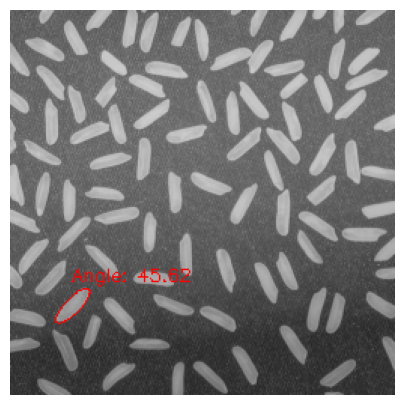

In [37]:
angle_img(344)